In [9]:
# Import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Modelling

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error

# HyperParameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [29]:
## Read CSV data into a pandas DataFrame
df = pd.read_csv('/Users/samirul/Codes/python/ML/Projects/Agriculture-Crop-Yield/notebook/data/crop_yield.csv')

In [30]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [32]:
df.Fertilizer_Used = df.Fertilizer_Used.astype(int)

In [33]:
df.Irrigation_Used = df.Irrigation_Used.astype(int)

In [34]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,0,1,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,1,1,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,0,0,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,0,1,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,1,1,Cloudy,110,7.248251


In [35]:
# Lets split data into X and y

X = df.drop(['Yield_tons_per_hectare','Days_to_Harvest' ], axis = 1)
y = df['Yield_tons_per_hectare']
X.shape, y.shape

((1000000, 8), (1000000,))

In [36]:
# Create column transformer 

num_features = X.select_dtypes(exclude ='object').columns
cat_features = X.select_dtypes(include='object').columns
num_features

Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used'],
      dtype='object')

In [37]:
cat_features

Index(['Region', 'Soil_Type', 'Crop', 'Weather_Condition'], dtype='object')

In [38]:
numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder" , cat_transformer , cat_features),
        ("Standardscaler", numeric_transformer, num_features)
    ]
)

In [39]:
# Fit X

X = preprocessor.fit_transform(X)
X.shape

(1000000, 23)

In [40]:
# Split data into train test sets

X_train ,X_test , y_train , y_test = train_test_split(X, y ,test_size=0.2)
X_train.shape , X_test.shape ,y_train.shape , y_test.shape

((800000, 23), (200000, 23), (800000,), (200000,))

In [41]:
# Create Evaluate Function after modelling
def evaluate_model(true_values , predicted_values):
    mae = mean_absolute_error(true_values , predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values,predicted_values))
    r2 = r2_score(true_values, predicted_values)

    return mae , mse , rmse , r2

In [43]:
# Modelling

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    #Train Model
    model.fit(X_train , y_train)

    # Make Predictions
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)

    # Evaluate on Train test data

    model_train_mae , model_train_mse , model_train_rmse ,model_train_r2_score = evaluate_model(y_train, y_train_preds)
    model_test_mae , model_test_mse , model_test_rmse ,model_test_r2_score = evaluate_model(y_test , y_test_preds)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_score))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2_score))
    r2_list.append(model_test_r2_score)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5005
- Mean Absolute Error: 0.3993
- R2 Score: 0.9130
- Mean Squared Error: 0.2505
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5003
- Mean Absolute Error: 0.3992
- Mean Squared Error: 0.2503
- R2 Score: 0.9130


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.4817
- Mean Absolute Error: 1.2059
- R2 Score: 0.2374
- Mean Squared Error: 2.1953
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4813
- Mean Absolute Error: 1.2059
- Mean Squared Error: 2.1943
- R2 Score: 0.2373


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5005
- Mean Absolute Error: 0.3993
- R2 Score: 0.9130
- Mean Squared Error: 0.2505
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5002
- Mean Absolute Error: 0.3992
- Mean Squared Error: 0.2502
- R2 Score

In [45]:
model_r2 = pd.DataFrame(list(zip(model_list ,r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [53]:
model_r2

,Model Name,R2_Score
2,Ridge,0.913016
0,Linear Regression,0.913014
7,CatBoosting Regressor,0.912785
6,XGBRegressor,0.912450
5,Random Forest Regressor,0.906226
3,K-Neighbors Regressor,0.893289
8,AdaBoost Regressor,0.883483
4,Decision Tree,0.815242
1,Lasso,0.237279


<BarContainer object of 9 artists>

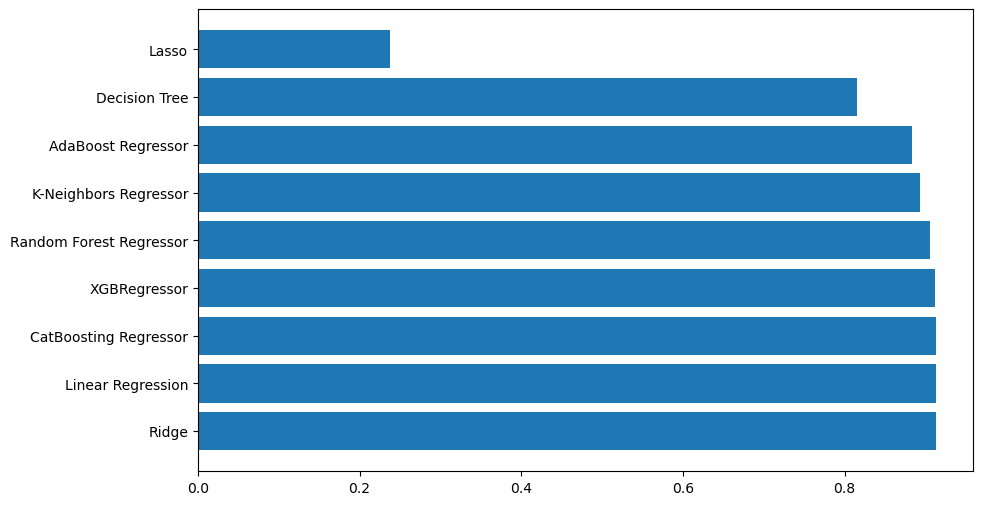

In [57]:
ax ,fig = plt.subplots(figsize = (10,6))
plt.barh(model_r2['Model Name'],model_r2.R2_Score)

In [58]:
# Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 91.30


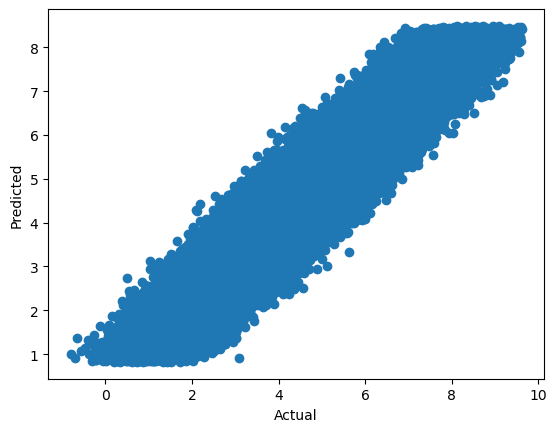

In [59]:
# Plot y_test and y_pred
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

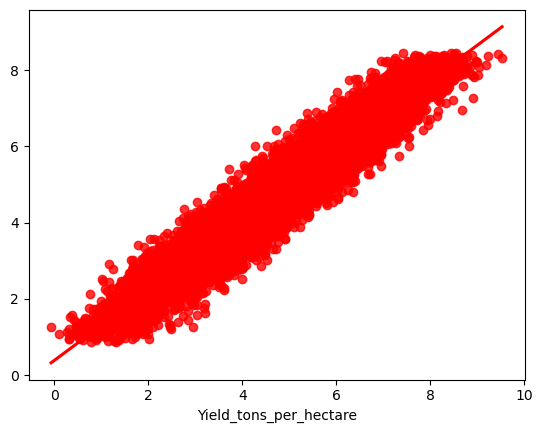

In [61]:
sns.regplot(x=y_test[:10000],y=y_pred[:10000],ci=None,color ='red');

In [62]:
# Difference between actual and predicted values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
717769,4.204286,5.505985,-1.301699
814493,3.926202,4.114381,-0.188179
177292,8.116880,8.274748,-0.157868
672726,5.052169,5.273817,-0.221648
807035,6.341500,6.631819,-0.290319
...,...,...,...
965978,2.712773,3.049170,-0.336398
879935,4.153483,4.013358,0.140125
312523,2.801452,1.377336,1.424117
938463,6.396256,5.560756,0.835501
